## PCA

The data corresponds to a set of signals recorded from an industrial process and are quite “typical” signals. Each signal
represents the evolution of a temperature recorded from a sensor for a motor on a bench test or for chemical batches.\
The file _sigref.csv_ contains a set of **n = 100 signals** sampled over **p = 120 points**.We are faced with huge dimensional data as we have 120 differents explicatives variables.\
The main objective of this practical session is to find less variable which resume information contained in the raw data. In other word, proposed an approach to compress signal.

In [14]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity="all"

### Import and data vizualisation

In [37]:
data = pd.read_csv("D:/SAF 2/MACHINE LEARNING 2/TP/sigref.csv",header=None)
tab=np.array(data)
n=len(tab)

#### Représentation des signaux

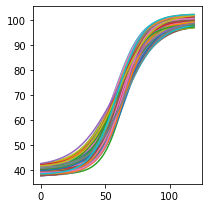

In [33]:
fig, axes = plt.subplots(1,1,figsize=(3,3))
for k in range(100):
    plt.plot(tab[k,:])
plt.tight_layout()
plt.show()

#### Data exploration

In [10]:
data.shape

(100, 120)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,39.985,40.013,40.044,40.078,40.115,40.155,40.200,40.248,40.301,40.360,...,99.211,99.253,99.291,99.326,99.358,99.387,99.413,99.438,99.460,99.480
1,39.298,39.316,39.336,39.358,39.382,39.409,39.439,39.472,39.508,39.548,...,98.378,98.411,98.441,98.469,98.493,98.516,98.536,98.555,98.571,98.586
2,40.613,40.646,40.681,40.720,40.762,40.808,40.857,40.911,40.969,41.032,...,99.354,99.430,99.499,99.563,99.623,99.677,99.727,99.773,99.816,99.855
3,40.411,40.441,40.473,40.508,40.546,40.587,40.632,40.681,40.734,40.792,...,99.863,99.937,100.010,100.070,100.130,100.180,100.230,100.270,100.320,100.350
4,39.555,39.561,39.568,39.576,39.584,39.594,39.604,39.616,39.629,39.644,...,101.160,101.210,101.250,101.290,101.330,101.360,101.390,101.420,101.450,101.470


In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,40.314550,40.342420,40.372760,40.405530,40.441070,40.47976,40.521560,40.566970,40.61620,40.669590,...,99.133550,99.202370,99.265850,99.324250,99.378260,99.427640,99.47287,99.515320,99.553430,99.589020
std,1.462455,1.463415,1.464765,1.466399,1.468446,1.47095,1.474012,1.477772,1.48216,1.487377,...,1.397935,1.386592,1.376538,1.367588,1.359374,1.351741,1.34468,1.339141,1.332942,1.328197
min,37.887000,37.916000,37.947000,37.981000,38.018000,38.05800,38.101000,38.148000,38.17500,38.197000,...,96.307000,96.439000,96.552000,96.623000,96.690000,96.752000,96.81000,96.864000,96.914000,96.961000
25%,38.970000,39.009000,39.042750,39.070000,39.113250,39.15775,39.178250,39.213750,39.25600,39.274000,...,98.125750,98.198000,98.248250,98.296500,98.380750,98.436750,98.47725,98.519500,98.559250,98.599250
50%,40.430000,40.461500,40.495500,40.532500,40.573500,40.61850,40.672000,40.736000,40.79000,40.824000,...,99.211500,99.247500,99.280500,99.344000,99.374000,99.414000,99.45550,99.493500,99.510000,99.537500
75%,41.622250,41.639500,41.658000,41.677750,41.699250,41.71325,41.721750,41.731750,41.74225,41.784500,...,100.125000,100.202500,100.267500,100.310000,100.370000,100.415000,100.45000,100.482500,100.505000,100.530000
max,42.779000,42.862000,42.951000,43.046000,43.147000,43.25400,43.369000,43.490000,43.61900,43.757000,...,102.050000,102.090000,102.120000,102.160000,102.180000,102.210000,102.23000,102.260000,102.270000,102.290000


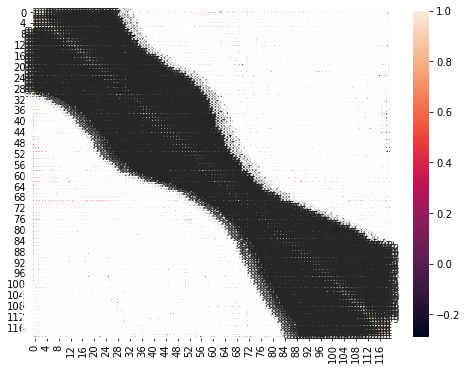

In [15]:
corr_data = data.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True)
plt.show()

We are in the presence of 120 quantitative variables that define temperatures at given times. In total, we have 100 different signals. There are no missing values in the data sets. The central tendency and dispersion characteristics depend on the signals. We can also notice that some variables are correlated with each other.

### PCA

#### Step 1: Data standardization

The first step of PCA method is to standardize data. PCA is sensible to data unit and to central trend characteristic. In fact if some variable have a large variance and some small, PCA (maximizing variance) will load on the large variances. So it is important to be free of this constraints by standardize data (mean = 0 and variance = 1).\
Use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html for standardize your data. Be careful to remove the label column if available. There is no label in this dataset.

In [39]:
tab_stand=StandardScaler().fit_transform(tab)
print (tab)
print (tab_stand)

[[ 39.985  40.013  40.044 ...  99.438  99.46   99.48 ]
 [ 39.298  39.316  39.336 ...  98.555  98.571  98.586]
 [ 40.613  40.646  40.681 ...  99.773  99.816  99.855]
 ...
 [ 40.823  40.854  40.887 ...  98.446  98.527  98.603]
 [ 41.84   41.884  41.931 ... 101.76  101.81  101.86 ]
 [ 38.658  38.677  38.697 ... 102.26  102.27  102.29 ]]
[[-0.22647555 -0.22623758 -0.22557633 ... -0.05802936 -0.07044621
  -0.08249468]
 [-0.69860029 -0.7049201  -0.71136549 ... -0.72072889 -0.74075216
  -0.75897826]
 [ 0.2051028   0.2084913   0.21149668 ...  0.19339118  0.19797776
   0.20126522]
 ...
 [ 0.34942041  0.35134061  0.35284211 ... -0.80253438 -0.77392815
  -0.74611448]
 [ 1.04832995  1.05871937  1.06917527 ...  1.68465275  1.70145364
   1.71843479]
 [-1.13842537 -1.14376964 -1.14981078 ...  2.0599073   2.04829361
   2.0438128 ]]


#### Step 2: PCA 
For more details about PCA usin python please see here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [127]:
pcamodel=PCA(svd_solver='full')
pcafit=pcamodel.fit(tab_stand)

Firstly, I don't choose the number of principal components in my PCA model. By default it will equal to\
Let's take a look on explained variance and singular values to choose the number of principal component to use in my signal reconstruction.

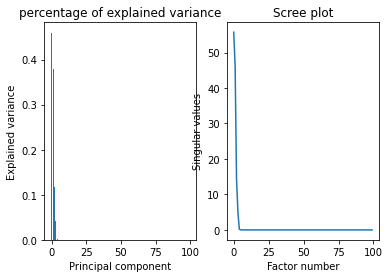

In [128]:
# Explained variance
#print(pcafit.explained_variance_ratio_)
plt.subplot(121)
plt.bar(range(100),pcafit.explained_variance_ratio_)
plt.title('percentage of explained variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.subplot(122)
plt.plot(range(100),pcafit.explained_variance_)
plt.title("Scree plot")
plt.ylabel("Singular values")
plt.xlabel("Factor number")
plt.show()

In [75]:
pcafit.explained_variance_ratio_[0:10]

array([4.59707825e-01, 3.80113166e-01, 1.17412806e-01, 4.09261110e-02,
       1.49990846e-03, 3.27823540e-04, 1.05820237e-05, 1.56209214e-06,
       4.15949146e-08, 2.44250735e-08])

We can notice that the first two principal components explain 83,9% of data variability and three first principal components explain about 95% of data variability. In other words, with the to first principal components we get 84% of information contained in the data and 95% if we consider the first three principal components.\
We will chose the first three principal components to summarize our data.\
PCs are describe in **pcafit.components**. It is important to notice that all components are independant. We retain the first three principal components.

#### Step 3: New representation of data
Once the number of principal components is choose, we can now set the new data with size (100,3) instead of (100,120) ie for each individus, we will have only 3 explicative variables instead of 120. With this new data, we will loose about 5% of information contains the raw dataset but we will better represent our data and then speed up machine learning algorithm.

In [137]:
pca=PCA(n_components=3,svd_solver='full')
y=pca.fit_transform(tab)
print(np.shape(y))
newdata= pd.DataFrame(data = y, columns = ['pc1', 'pc2' , 'pc3'])

(100, 3)


In [138]:
display(data.head())
display(newdata.head())

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,39.985,40.013,40.044,40.078,40.115,40.155,40.200,40.248,40.301,40.360,...,99.211,99.253,99.291,99.326,99.358,99.387,99.413,99.438,99.460,99.480
1,39.298,39.316,39.336,39.358,39.382,39.409,39.439,39.472,39.508,39.548,...,98.378,98.411,98.441,98.469,98.493,98.516,98.536,98.555,98.571,98.586
2,40.613,40.646,40.681,40.720,40.762,40.808,40.857,40.911,40.969,41.032,...,99.354,99.430,99.499,99.563,99.623,99.677,99.727,99.773,99.816,99.855
3,40.411,40.441,40.473,40.508,40.546,40.587,40.632,40.681,40.734,40.792,...,99.863,99.937,100.010,100.070,100.130,100.180,100.230,100.270,100.320,100.350
4,39.555,39.561,39.568,39.576,39.584,39.594,39.604,39.616,39.629,39.644,...,101.160,101.210,101.250,101.290,101.330,101.360,101.390,101.420,101.450,101.470


,pc1,pc2,pc3
0,-21.906430,9.651459,7.652974
1,-7.639310,10.220587,11.409355
2,-9.050250,-1.503305,-0.479685
3,-5.988706,2.064333,-0.864369
4,33.431794,14.146068,-7.361431


In [ ]:
#### Signal reconstruction of new data configuration with 3 variables

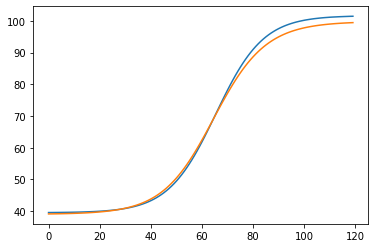

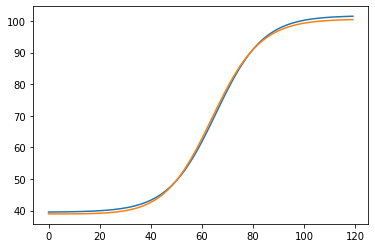

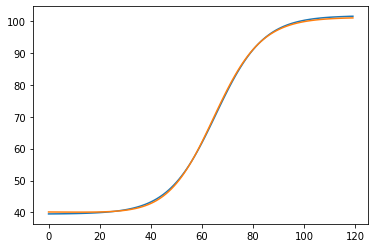

In [141]:
s=np.zeros((4,120))

s0=pca.mean_+y[4,0]*pca.components_[0,:]
s1=pca.mean_+y[4,0]*pca.components_[0,:]+y[4,1]*pca.components_[1,:]
s2=pca.mean_+y[4,0]*pca.components_[0,:]+y[4,1]*pca.components_[1,:]+y[4,2]*pca.components_[2,:]

plt.plot(tab[4,:]),plt.plot(s0);plt.show()
plt.plot(tab[4,:]),plt.plot(s1);plt.show()
plt.plot(tab[4,:]),plt.plot(s2);plt.show()

We can notice that the signal reconstructed based on three new variables (in orange color) is very close to the original signal represented in blue. This show that information are well preserved with this three first principal components.

So now imagine that, you have to perform a clustering algorithm (like spectral clustering or k-means). Instead of train your model with all of 120 features, you can use only the three features named pcs. This is call data reduction dimensionality or feature extraction for model training. \

_Note_: _PCA can also be use as classification method. In fact, we can plot the data in the new dimension (2 or 3 here) and denote the group of individus which are homogeneous according to there features. We will do example in R script for this application_